In [9]:
!pip install pycaret[tuners]

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [2]:
column_types = df.dtypes

print(column_types)

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
# Import necessary libraries
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model

# Load your dataset
import pandas as pd

# Configuración del experimento
exp_clf101 = setup(data=df, 
                   target='Exited', 
                   session_id=123, 
                   train_size=0.7, 
                   ignore_features=['id'], 
                   numeric_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
                   categorical_features=['Surname', 'Geography', 'Gender'])

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(165034, 14)"
4,Transformed data shape,"(165034, 15)"
5,Transformed train set shape,"(115523, 15)"
6,Transformed test set shape,"(49511, 15)"
7,Ignore features,1
8,Numeric features,8
9,Categorical features,3


In [5]:
# Comparación de modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8674,0.8922,0.5680,0.7449,0.6445,0.5648,0.5727,0.8360
gbc,Gradient Boosting Classifier,0.8669,0.8918,0.5462,0.7571,0.6345,0.5557,0.5668,5.0370
rf,Random Forest Classifier,0.8638,0.8833,0.5406,0.7459,0.6268,0.5461,0.5567,3.2850
ada,Ada Boost Classifier,0.8625,0.8831,0.5420,0.7389,0.6252,0.5434,0.5533,1.9000
et,Extra Trees Classifier,0.8615,0.8810,0.5234,0.7463,0.6153,0.5340,0.5465,3.5550
lda,Linear Discriminant Analysis,0.8341,0.8253,0.4254,0.6703,0.5205,0.4262,0.4423,0.3850
ridge,Ridge Classifier,0.8310,0.8253,0.3275,0.7218,0.4505,0.3669,0.4070,0.3200
dt,Decision Tree Classifier,0.8022,0.7094,0.5485,0.5316,0.5399,0.4140,0.4141,0.4390
lr,Logistic Regression,0.7973,0.7704,0.1953,0.5470,0.2850,0.1995,0.2355,1.9940
nb,Naive Bayes,0.7923,0.7691,0.1859,0.5258,0.2746,0.1845,0.2187,0.3270


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
# Creación de un modelo específico
dt = create_model('rf')  # Random Forest

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:02:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8665,0.8858,0.5472,0.7547,0.6344,0.5553,0.5660
1,0.8639,0.8807,0.5378,0.7484,0.6259,0.5454,0.5566
2,0.8632,0.8821,0.5419,0.7419,0.6263,0.5450,0.5551
3,0.8667,0.8832,0.5426,0.7586,0.6326,0.5539,0.5655
4,0.8629,0.8814,0.5360,0.7443,0.6232,0.5421,0.5530
5,0.8615,0.8826,0.5409,0.7344,0.6230,0.5405,0.5500
6,0.8664,0.8895,0.5401,0.7591,0.6311,0.5524,0.5643
7,0.8637,0.8817,0.5450,0.7425,0.6286,0.5476,0.5574
8,0.8588,0.8792,0.5260,0.7315,0.6119,0.5285,0.5392


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
# Optimización de hiperparámetros

# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2]
}

# Perform Bayesian Search
tuned_dt = tune_model(dt, custom_grid=param_grid_bayesian, search_library='scikit-learn', search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8676,0.8923,0.5125,0.7876,0.6209,0.5450,0.5635
1,0.8651,0.8887,0.5014,0.7829,0.6113,0.5344,0.5538
2,0.8638,0.8862,0.4953,0.7813,0.6063,0.5289,0.5490
3,0.8655,0.8905,0.4922,0.7935,0.6076,0.5317,0.5538
4,0.8643,0.8847,0.4926,0.7859,0.6056,0.5288,0.5499
5,0.8633,0.8893,0.5000,0.7739,0.6075,0.5293,0.5479
6,0.8642,0.8969,0.4939,0.7843,0.6061,0.5291,0.5498
7,0.8673,0.8889,0.5155,0.7831,0.6218,0.5454,0.5629
8,0.8615,0.8866,0.4953,0.7679,0.6022,0.5230,0.5415


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
# # Define the parameter grid for Random Search
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20]
# }

# # Perform Random Search
# tuned_model_random = tune_model(model, custom_grid=param_dist, search_library='scikit-learn', search_algorithm='random', n_iter=50)
# print(tuned_model_random)



# # Define the parameter grid for Bayesian Search
# param_grid_bayesian = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20]
# }

# # Perform Bayesian Search
# tuned_model_bayesian = tune_model(model, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian')
# print(tuned_model_bayesian)

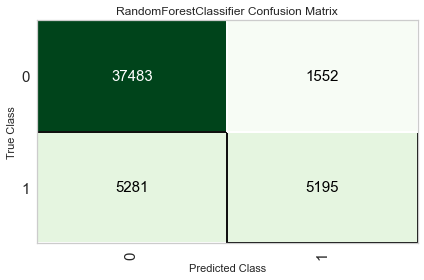

In [8]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

In [9]:
# Visualización exhaustiva del modelo
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

In [11]:
df_test = pd.read_csv('test.csv')
column_types = df_test.dtypes
print(column_types)

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object


In [12]:
# Realizar predicciones
predictions = predict_model(final_dt, data=df_test)

In [16]:
predictions

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,prediction_label,prediction_score
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.000000,2,0.0,1.0,160976.750000,0,0.9715
1,165035,15782418,Nott,683,France,Female,46.0,2,0.000000,1,1.0,0.0,72549.273438,1,0.7875
2,165036,15807120,K?,656,France,Female,34.0,7,0.000000,2,1.0,0.0,138882.093750,0,0.9545
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.000000,1,1.0,0.0,113931.570312,0,0.7897
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.617188,1,1.0,0.0,139431.000000,0,0.6407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.820312,1,1.0,1.0,148087.625000,0,0.9446
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.531250,1,1.0,1.0,42181.679688,0,0.8766
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.000000,2,1.0,0.0,16287.379883,0,0.9450
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.000000,1,1.0,1.0,158816.578125,0,0.7765


In [15]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': df_test['id'],
    'Exited': predictions['prediction_score']
})

# Save the result to a CSV file
result.to_csv('predictions_1.csv', index=False)

In [17]:
# Guardar y cargar modelos
save_model(final_dt, 'final_dt_model_customer_churn')

# To load the model later
loaded_model = load_model('final_dt_model_customer_churn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
